In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('car.csv')
df.head()

,Dimensions.Height,Dimensions.Length,Dimensions.Width,Engine Information.Driveline,Engine Information.Engine Type,Engine Information.Hybrid,Engine Information.Number of Forward Gears,Engine Information.Transmission,Fuel Information.City mpg,Fuel Information.Fuel Type,Fuel Information.Highway mpg,Identification.Classification,Identification.ID,Identification.Make,Identification.Model Year,Identification.Year,Engine Information.Engine Statistics.Horsepower,Engine Information.Engine Statistics.Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [3]:
df.columns = [s.strip().replace('.','_') for s in df.columns] 

In [13]:
df.columns = [s.strip().replace(' ','') for s in df.columns]

In [14]:
df.head()

,Dimensions_Height,Dimensions_Length,Dimensions_Width,EngineInformation_Driveline,EngineInformation_EngineType,EngineInformation_Hybrid,EngineInformation_NumberofForwardGears,EngineInformation_Transmission,FuelInformation_Citympg,FuelInformation_FuelType,FuelInformation_Highwaympg,Identification_Classification,Identification_ID,Identification_Make,Identification_ModelYear,Identification_Year,EngineInformation_EngineStatistics_Horsepower,EngineInformation_EngineStatistics_Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [15]:
df.shape

(5076, 18)

In [16]:
df1 = df.iloc[0:1000]
df1.head()

,Dimensions_Height,Dimensions_Length,Dimensions_Width,EngineInformation_Driveline,EngineInformation_EngineType,EngineInformation_Hybrid,EngineInformation_NumberofForwardGears,EngineInformation_Transmission,FuelInformation_Citympg,FuelInformation_FuelType,FuelInformation_Highwaympg,Identification_Classification,Identification_ID,Identification_Make,Identification_ModelYear,Identification_Year,EngineInformation_EngineStatistics_Horsepower,EngineInformation_EngineStatistics_Torque
0,140,143,202,All-wheel drive,Audi 3.2L 6 cylinder 250hp 236ft-lbs,True,6,6 Speed Automatic Select Shift,18,Gasoline,25,Automatic transmission,2009 Audi A3 3.2,Audi,2009 Audi A3,2009,250,236
1,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,22,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T AT,Audi,2009 Audi A3,2009,200,207
2,140,143,202,Front-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Manual,21,Gasoline,30,Manual transmission,2009 Audi A3 2.0 T,Audi,2009 Audi A3,2009,200,207
3,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207
4,140,143,202,All-wheel drive,Audi 2.0L 4 cylinder 200 hp 207 ft-lbs Turbo,True,6,6 Speed Automatic Select Shift,21,Gasoline,28,Automatic transmission,2009 Audi A3 2.0 T Quattro,Audi,2009 Audi A3,2009,200,207


In [17]:
df1.shape

(1000, 18)

In [18]:
df1.describe()

,Dimensions_Height,Dimensions_Length,Dimensions_Width,EngineInformation_NumberofForwardGears,FuelInformation_Citympg,FuelInformation_Highwaympg,Identification_Year,EngineInformation_EngineStatistics_Horsepower,EngineInformation_EngineStatistics_Torque
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,146.663000,127.370000,137.084000,5.599000,19.661000,27.676000,2010.709000,253.473000,248.650000
std,58.208588,75.741229,72.427997,0.806753,4.606876,5.514838,0.773898,113.749436,116.089906
min,1.000000,7.000000,3.000000,4.000000,8.000000,12.000000,2009.000000,108.000000,105.000000
25%,109.000000,63.000000,72.000000,5.000000,17.000000,24.000000,2010.000000,170.000000,167.000000
50%,160.500000,140.000000,129.000000,6.000000,19.000000,27.000000,2011.000000,240.000000,246.000000
75%,190.000000,196.000000,214.000000,6.000000,23.000000,31.000000,2011.000000,305.250000,280.000000
max,247.000000,255.000000,249.000000,8.000000,38.000000,42.000000,2012.000000,631.000000,774.000000


<AxesSubplot:xlabel='FuelInformation_FuelType', ylabel='count'>

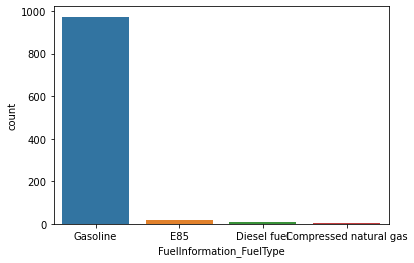

In [19]:
sns.countplot(x=df1['FuelInformation_FuelType'])

<AxesSubplot:xlabel='Identification_Classification', ylabel='count'>

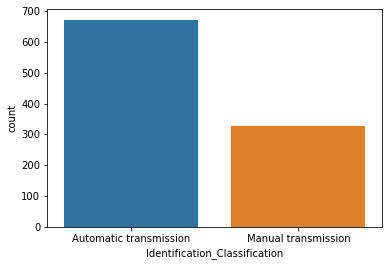

In [20]:
sns.countplot(x=df1['Identification_Classification'])

Text(0.5, 1.0, 'Dimension_Height')

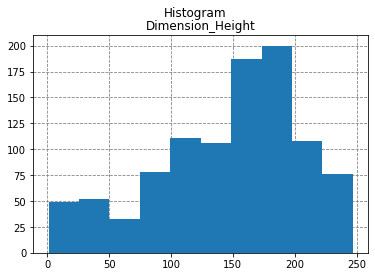

In [24]:
fig, ax = plt.subplots()
ax.hist(df1.Dimensions_Height)
ax.set_axisbelow(True) #Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
plt.suptitle('Histogram') # Suppress the titles
plt.title('Dimension_Height')


Text(0.5, 1.0, 'Dimension_Length')

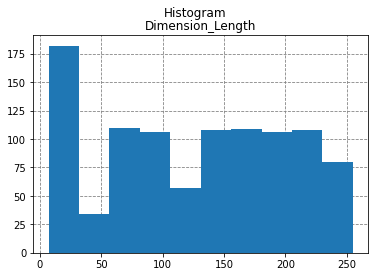

In [25]:
fig, ax = plt.subplots()
ax.hist(df1.Dimensions_Length)
ax.set_axisbelow(True) #Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
plt.suptitle('Histogram') # Suppress the titles
plt.title('Dimension_Length')

Text(0.5, 1.0, 'Dimension_Width')

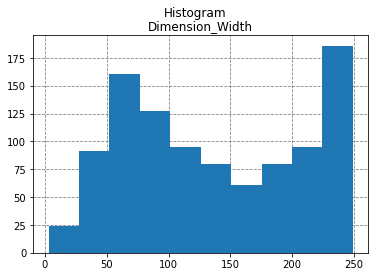

In [26]:
fig, ax = plt.subplots()
ax.hist(df1.Dimensions_Width)
ax.set_axisbelow(True) #Show the grid lines behind the histogram
ax.grid(which='major', color='grey', linestyle='--')
plt.suptitle('Histogram') # Suppress the titles
plt.title('Dimension_Width')

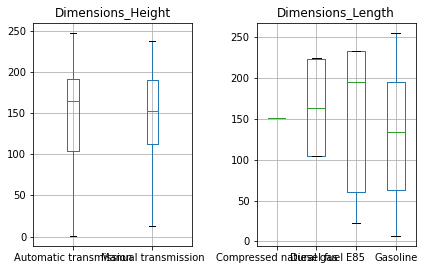

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
df1.boxplot(column='Dimensions_Height', by='Identification_Classification', ax=axes[0])
df1.boxplot(column='Dimensions_Length', by='FuelInformation_FuelType', ax=axes[1])
#df1.boxplot(column='FuelInformation_Citympg', by='Identification_Classification', ax=axes[2])
#df1.boxplot(column='FuelInformation_Highwaympg', by='Identification_Classification', ax=axes[3])
for ax in axes:
    ax.set_xlabel('')
plt.suptitle('') # Suppress the overall title
plt.tight_layout() #Increase the separation between the plots

In [37]:
corr=df.corr().round(2)
corr

,Dimensions_Height,Dimensions_Length,Dimensions_Width,EngineInformation_Hybrid,EngineInformation_NumberofForwardGears,FuelInformation_Citympg,FuelInformation_Highwaympg,Identification_Year,EngineInformation_EngineStatistics_Horsepower,EngineInformation_EngineStatistics_Torque
Dimensions_Height,1.00,0.05,-0.22,NaN,0.06,0.25,0.25,0.04,-0.15,-0.18
Dimensions_Length,0.05,1.00,0.02,NaN,-0.04,-0.02,-0.01,-0.03,0.02,0.02
Dimensions_Width,-0.22,0.02,1.00,NaN,-0.17,-0.14,-0.18,-0.02,0.04,0.14
EngineInformation_Hybrid,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EngineInformation_NumberofForwardGears,0.06,-0.04,-0.17,NaN,1.00,-0.04,0.05,0.14,0.32,0.23
FuelInformation_Citympg,0.25,-0.02,-0.14,NaN,-0.04,1.00,0.87,0.09,-0.70,-0.75
FuelInformation_Highwaympg,0.25,-0.01,-0.18,NaN,0.05,0.87,1.00,0.11,-0.55,-0.62
Identification_Year,0.04,-0.03,-0.02,NaN,0.14,0.09,0.11,1.00,0.01,-0.02
EngineInformation_EngineStatistics_Horsepower,-0.15,0.02,0.04,NaN,0.32,-0.70,-0.55,0.01,1.00,0.94
EngineInformation_EngineStatistics_Torque,-0.18,0.02,0.14,NaN,0.23,-0.75,-0.62,-0.02,0.94,1.00


<AxesSubplot:>

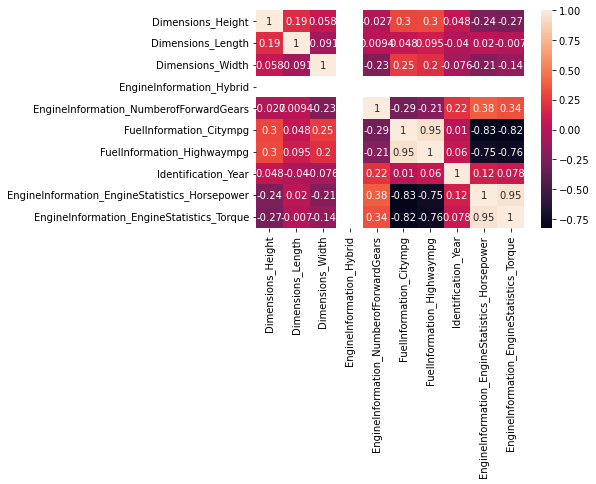

In [34]:
sns.heatmap(corr, annot= True)

<AxesSubplot:>

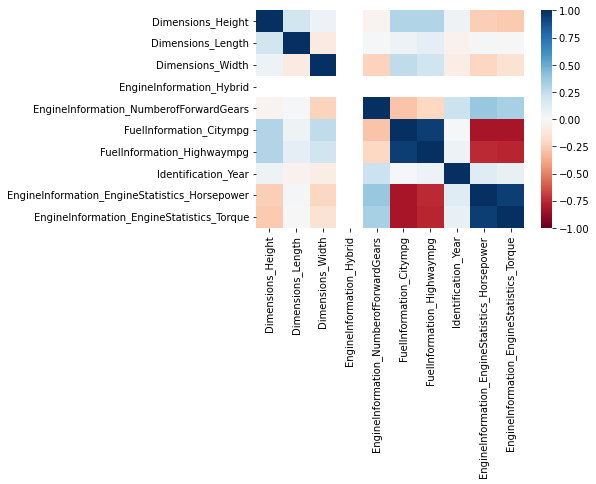

In [35]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1,
vmax=1, cmap="RdBu")

<AxesSubplot:>

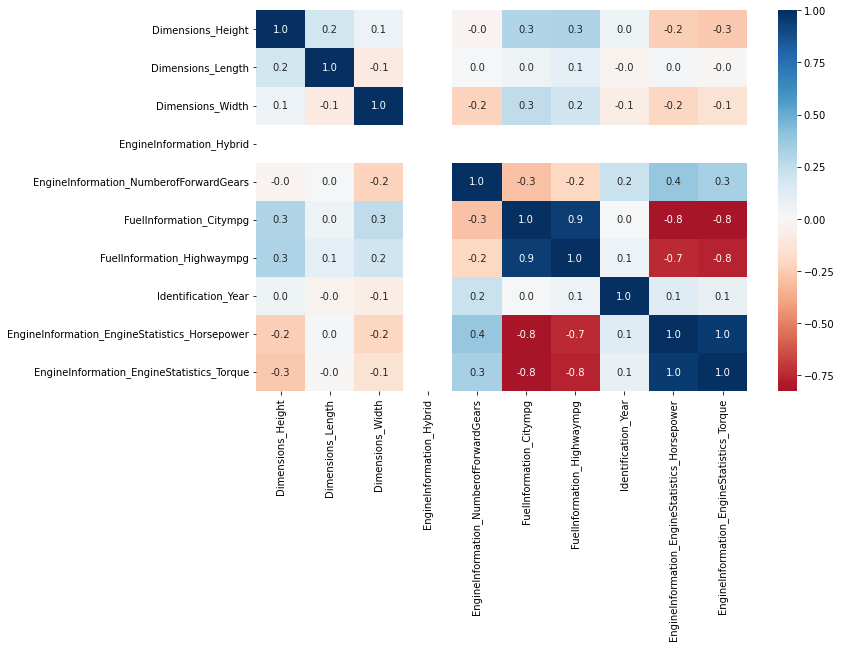

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

In [45]:
pca_df = df1[['EngineInformation_EngineStatistics_Horsepower','FuelInformation_Highwaympg']]
pca_df.corr().round(2)

,EngineInformation_EngineStatistics_Horsepower,FuelInformation_Highwaympg
EngineInformation_EngineStatistics_Horsepower,1.00,-0.75
FuelInformation_Highwaympg,-0.75,1.00


In [46]:
pcs = PCA(n_components=2)
pcs.fit(df1[['EngineInformation_EngineStatistics_Horsepower', 'FuelInformation_Highwaympg']])

PCA(n_components=2)

In [47]:
pcs.explained_variance_ratio_

array([0.99896679, 0.00103321])